In [1]:
import pandas as pd
import numpy as np

In [2]:
file1=r"I:\data scientist using python\project2\carvan_train.csv"
file2=r"I:\data scientist using python\project2\carvan_test.csv"
carvan_train=pd.read_csv(file1)
carvan_test=pd.read_csv(file2)

In [3]:
carvan_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


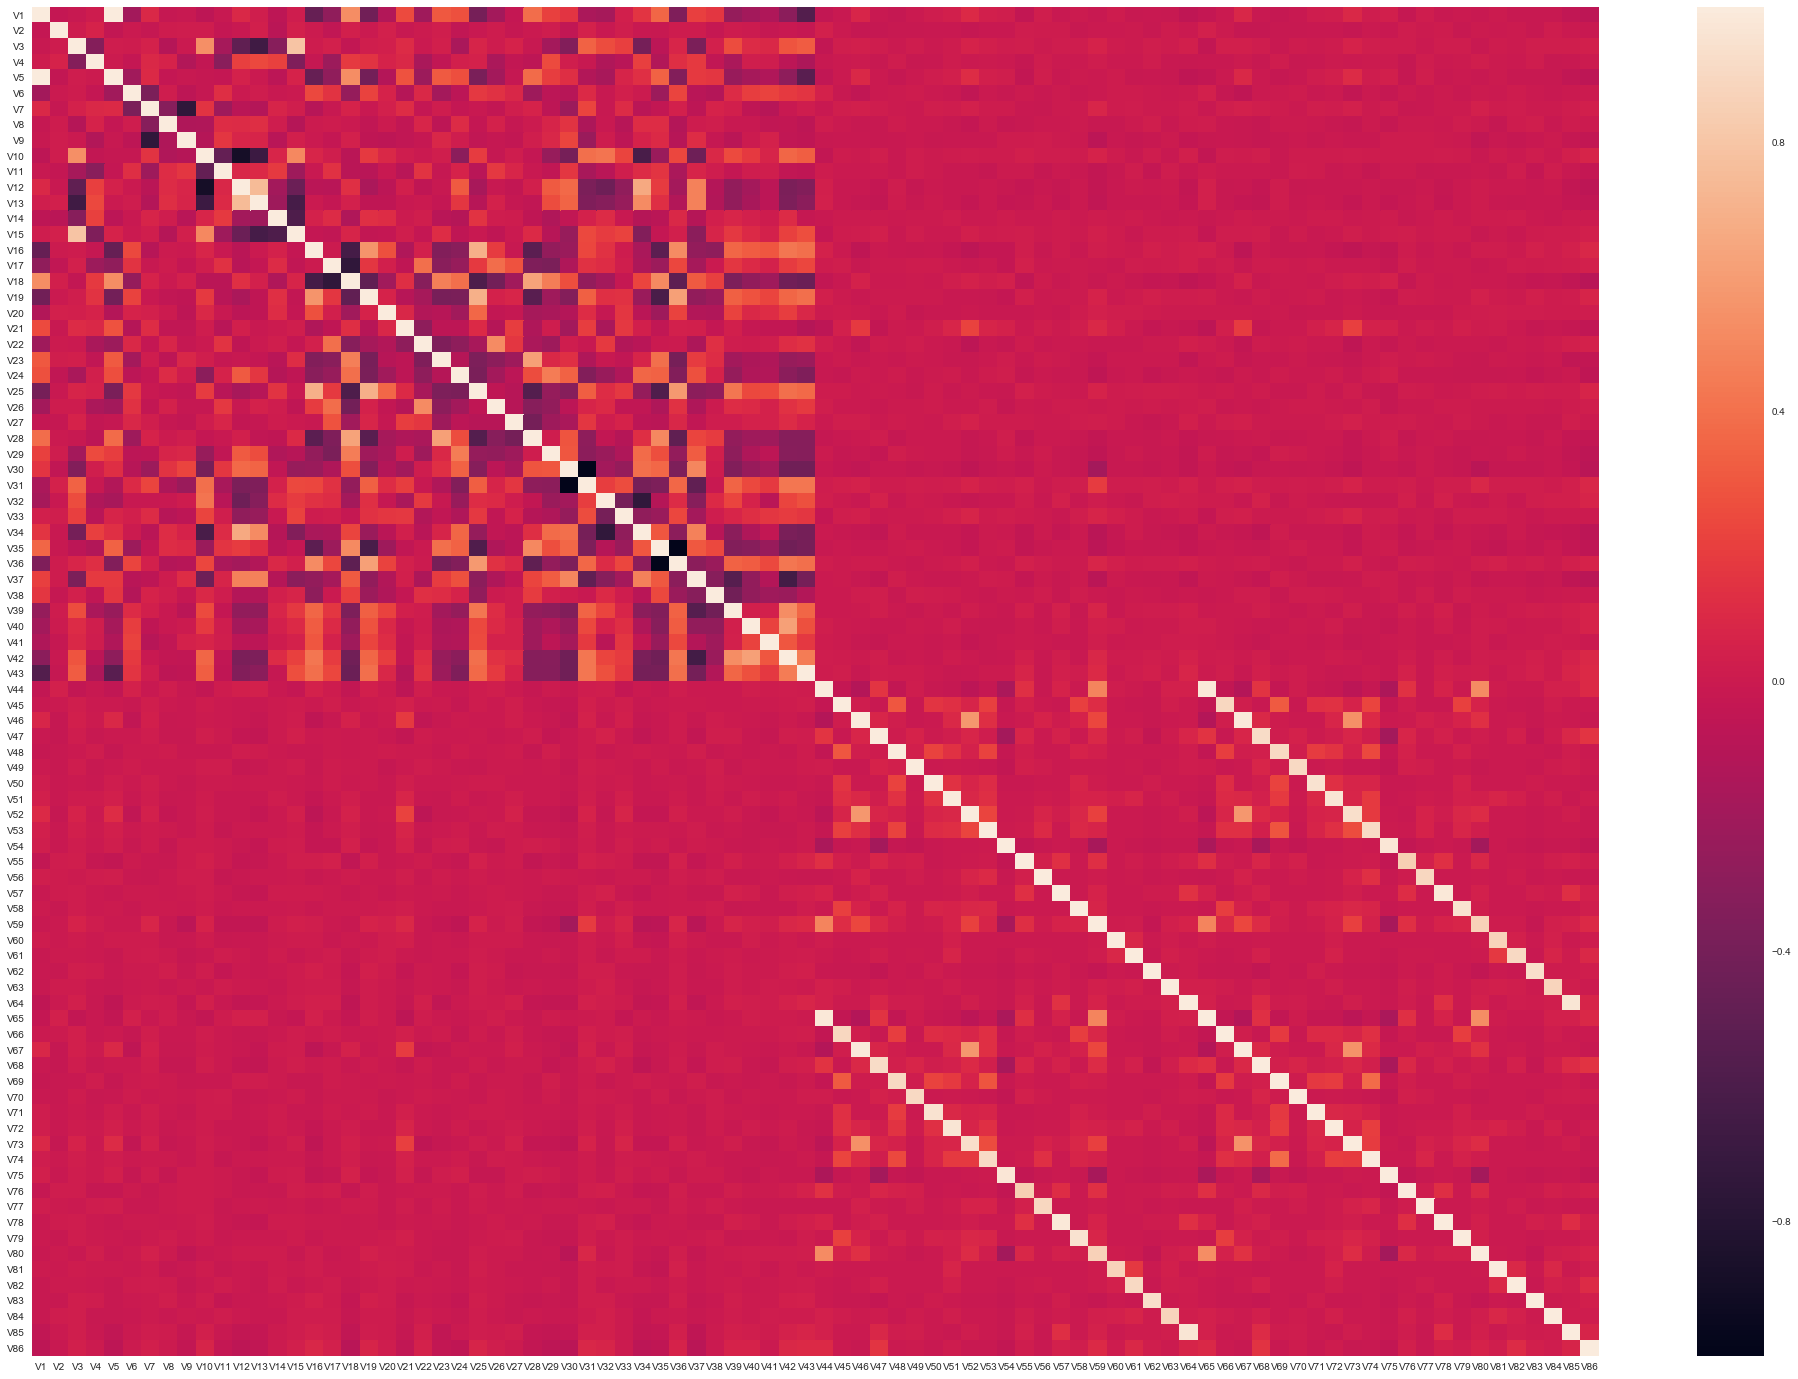

In [4]:
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7*3,8.27*3)})
corr = carvan_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
corr.style.background_gradient().set_precision(2)

* V1 and V5 are highly correlated so drop V1 as it has many categories
* V44 to V64 highly correlated with V65 to V85. So drop V44 to V64 as it doesnt add any information thus taking care of multicollinearity
### Inverse relation
* V31 || V30
* V36 || V35
* V10 || V12

In [4]:
# Create correlation matrix
corr_matrix = carvan_train.corr().abs()

# Select upper triangle of correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in lower.columns if any(lower[column] > 0.7)]

In [5]:
to_drop

['V1',
 'V3',
 'V7',
 'V10',
 'V12',
 'V17',
 'V30',
 'V32',
 'V35',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64']

In [6]:
train=carvan_train.copy()
test=carvan_test.copy()
for i in to_drop:
    del train[i]
    del test[i]

In [52]:
train.head()

,V2,V4,V5,V6,V8,V9,V11,V13,V14,V15,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,1,2,8,0,1,3,0,1,2,6,...,0,0,0,1,0,0,0,0,0,0
1,1,2,8,1,1,4,2,0,4,5,...,0,0,0,1,0,0,0,0,0,0
2,1,2,8,0,2,4,2,4,4,2,...,0,0,0,1,0,0,0,0,0,0
3,1,3,3,2,2,4,2,2,3,4,...,0,0,0,1,0,0,0,0,0,0
4,1,2,10,1,1,4,1,2,4,4,...,0,0,0,1,0,0,0,0,0,0


In [53]:
train.columns

Index(['V2', 'V4', 'V5', 'V6', 'V8', 'V9', 'V11', 'V13', 'V14', 'V15', 'V16',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V31', 'V33', 'V34', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86'],
      dtype='object')

In [54]:
train['V86'].value_counts()

0    5474
1     348
Name: V86, dtype: int64

In [55]:
#pd.crosstab(carvan_train['V86'],carvan_train['V1'],rownames=['V86'],colnames=['V1'])

In [56]:
# col: V1
#freq=carvan_train['V1'].value_counts()
# k=freq.index[freq>=100][:-1]
# for cat in k:
#     name='V1_'+str(cat)
#     carvan_train[name]=(carvan_train['V1']==cat).astype('int')
#     carvan_test[name]=(carvan_test['V1']==cat).astype('int')
# del carvan_train['V1']
# del carvan_test['V1']

In [57]:
train['V2'].value_counts()

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: V2, dtype: int64

In [58]:
pd.crosstab(carvan_train['V86'],carvan_train['V2'],rownames=['V86'],colnames=['V2'])

V2,1,2,3,4,5,6,7,8,10
V86,,,,,,,,,
0,4952,472,39,2,1,1,5,1,1
1,315,33,0,0,0,0,0,0,0


In [7]:
train['V2_1']=np.where(train['V2']==1,1,0)
train['V2_2']=np.where(train['V2']==2,1,0)
test['V2_1']=np.where(test['V2']==1,1,0)
test['V2_2']=np.where(test['V2']==2,1,0)

del train['V2'],test['V2']

In [14]:
#pd.crosstab(carvan_train['V86'],carvan_train['V3'],rownames=['V86'],colnames=['V3'])

In [15]:
# carvan_train['V3_small']=np.where(carvan_train['V3']==1,1,0)
# carvan_train['V3_medium']=0
# for i in range(len(carvan_train['V3'])):
#     if(carvan_train['V3'][i]==2 or carvan_train['V3'][i]==3 or carvan_train['V3'][i]==4):
#         carvan_train['V3_medium'][i]=1
# del carvan_train['V3']

# carvan_test['V3_small']=np.where(carvan_test['V3']==1,1,0)
# carvan_test['V3_medium']=0
# for i in range(len(carvan_test['V3'])):
#     if(carvan_test['V3'][i]==2 or carvan_test['V3'][i]==3 or carvan_test['V3'][i]==4):
#         carvan_test['V3_medium'][i]=1

# del carvan_test['V3']

In [15]:
pd.crosstab(carvan_train['V86'],carvan_train['V4'],rownames=['V86'],colnames=['V4'])

V4,1,2,3,4,5,6
V86,,,,,,
0,73,1365,2817,1009,181,29
1,1,87,183,64,12,1


In [8]:
# Col V4
k1=pd.get_dummies(train['V4'],drop_first=True,prefix='V4')
train=pd.concat([train,k1],axis=1)
del train['V4']

k2=pd.get_dummies(test['V4'],drop_first=True,prefix='V4')
test=pd.concat([test,k2],axis=1)
del test['V4']

In [61]:
test.columns

Index(['V5', 'V6', 'V8', 'V9', 'V11', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V31', 'V33', 'V34', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73',
       'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V2_1', 'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5', 'V4_6'],
      dtype='object')

In [12]:
train['V5'].value_counts()

8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: V5, dtype: int64

In [20]:
pd.crosstab(carvan_train['V86'],carvan_train['V5'],rownames=['V86'],colnames=['V5'])

V5,1,2,3,4,5,6,7,8,9,10
V86,,,,,,,,,,
0,504,436,827,52,554,201,530,1474,625,271
1,48,66,59,0,15,4,20,89,42,5


In [9]:
# Col V5
k1=pd.get_dummies(train['V5'],drop_first=True,prefix='V5')
train=pd.concat([train,k1],axis=1)
del train['V5']

k2=pd.get_dummies(test['V5'],drop_first=True,prefix='V5')
test=pd.concat([test,k2],axis=1)
del test['V5']

In [10]:
train.columns

Index(['V6', 'V8', 'V9', 'V11', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V31', 'V33', 'V34', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73',
       'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V2_1', 'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5',
       'V4_6', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9',
       'V5_10'],
      dtype='object')

In [11]:
train['V6'].value_counts()

0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: V6, dtype: int64

In [25]:
pd.crosstab(carvan_train['V86'],carvan_train['V6'],rownames=['V86'],colnames=['V6'])

V6,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,3051,1492,679,145,65,17,12,6,3,4
1,177,107,54,7,1,1,1,0,0,0


In [12]:
def dummies_freq(col,f):
    freq=train[col].value_counts()
    k=freq.index[freq>=f]
    for cat in k:
        name=col+'_'+str(cat)
        train[name]=(train[col]==cat).astype('int')
        test[name]=(test[col]==cat).astype('int')
    del train[col]
    del test[col]

def col_convert(col):
    name=col+'_0'
    train[name]=np.where(train[col]==0,1,0)
    test[name]=np.where(test[col]==0,1,0)  
    del train[col],test[col]

In [13]:
# Col V6
dummies_freq('V6',150)

In [14]:
train.columns

Index(['V8', 'V9', 'V11', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V31',
       'V33', 'V34', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43',
       'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84',
       'V85', 'V86', 'V2_1', 'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5', 'V4_6',
       'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10',
       'V6_0', 'V6_1', 'V6_2', 'V6_3'],
      dtype='object')

In [29]:
train['V8'].value_counts()

1    2014
0    2003
2    1388
3     257
4     132
5      28
Name: V8, dtype: int64

In [30]:
pd.crosstab(carvan_train['V86'],carvan_train['V8'],rownames=['V86'],colnames=['V8'])

V8,0,1,2,3,4,5
V86,,,,,,
0,1873,1921,1289,239,125,27
1,130,93,99,18,7,1


In [15]:
# Col V8
dummies_freq("V8",1000)

In [32]:
train['V9'].value_counts()

3    1453
4    1334
2    1055
5     963
0     456
1     230
6     217
7     101
9       8
8       5
Name: V9, dtype: int64

In [33]:
pd.crosstab(train['V86'],train['V9'],rownames=['V86'],colnames=['V9'])

V9,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,419,209,986,1366,1264,912,213,92,5,8
1,37,21,69,87,70,51,4,9,0,0


In [34]:
train['V11'].value_counts()

0    2448
1    2030
2    1075
3     159
4      78
5      18
6      13
7       1
Name: V11, dtype: int64

In [35]:
pd.crosstab(train['V86'],train['V11'],rownames=['V86'],colnames=['V11'])

V11,0,1,2,3,4,5,6,7
V86,,,,,,,,
0,2287,1910,1016,152,77,18,13,1
1,161,120,59,7,1,0,0,0


In [16]:
# Col V11
dummies_freq('V11',1000)

In [21]:
train.columns

Index(['V9', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V31', 'V33', 'V34',
       'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V65', 'V66',
       'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76',
       'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86',
       'V2_1', 'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5', 'V4_6', 'V5_2', 'V5_3',
       'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V6_0', 'V6_1',
       'V6_2', 'V6_3', 'V8_1', 'V8_0', 'V8_2', 'V11_0', 'V11_1', 'V11_2'],
      dtype='object')

In [34]:
train['V13'].value_counts()

0    1757
2    1247
1     951
3     848
4     519
5     259
6     127
7      67
8      24
9      23
Name: V13, dtype: int64

In [35]:
pd.crosstab(train['V86'],train['V13'],rownames=['V86'],colnames=['V13'])

V13,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1629,887,1172,807,498,246,123,66,23,23
1,128,64,75,41,21,13,4,1,1,0


In [17]:
# col: V13
dummies_freq("V13",500)

In [37]:
train['V14'].value_counts()

3    1498
4    1455
2    1060
5     606
1     372
0     371
6     321
7      96
9      29
8      14
Name: V14, dtype: int64

In [38]:
pd.crosstab(train['V86'],train['V14'],rownames=['V86'],colnames=['V14'])

V14,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,348,348,1003,1409,1367,576,294,88,13,28
1,23,24,57,89,88,30,27,8,1,1


In [23]:
train.columns

Index(['V9', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V31', 'V33', 'V34', 'V36',
       'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V65', 'V66', 'V67',
       'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77',
       'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V2_1',
       'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5', 'V4_6', 'V5_2', 'V5_3', 'V5_4',
       'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V6_0', 'V6_1', 'V6_2',
       'V6_3', 'V8_1', 'V8_0', 'V8_2', 'V11_0', 'V11_1', 'V11_2', 'V13_0',
       'V13_2', 'V13_1', 'V13_3', 'V13_4'],
      dtype='object')

In [39]:
train['V15'].value_counts()

4    1137
5    1106
3     973
6     783
2     635
7     351
1     292
8     206
9     186
0     153
Name: V15, dtype: int64

In [40]:
pd.crosstab(train['V86'],train['V15'],rownames=['V86'],colnames=['V15'])

V15,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,148,282,596,914,1071,1048,727,328,188,172
1,5,10,39,59,66,58,56,23,18,14


In [41]:
train['V16'].value_counts()

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: V16, dtype: int64

In [42]:
pd.crosstab(train['V86'],train['V16'],rownames=['V86'],colnames=['V16'])

V16,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,2056,1249,1074,508,289,166,59,45,20,8
1,91,73,70,39,37,21,8,6,2,1


In [72]:
# col: V16
# freq=train['V16'].value_counts()
# k=freq.index[freq>=500]
# for cat in k:
#     name='V16_'+str(cat)
#     train[name]=(train['V16']==cat).astype('int')
#     test[name]=(test['V16']==cat).astype('int')
# del train['V16']
# del test['V16']

In [76]:
# col=carvan_train['V16'].copy()
# train['V16']=col
# test['V16']=carvan_test['V16'].copy()

In [43]:
train.columns

Index(['V9', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V31', 'V33', 'V34', 'V36',
       'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V65', 'V66', 'V67',
       'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77',
       'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V2_1',
       'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5', 'V4_6', 'V5_2', 'V5_3', 'V5_4',
       'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V6_0', 'V6_1', 'V6_2',
       'V6_3', 'V8_1', 'V8_0', 'V8_2', 'V11_0', 'V11_1', 'V11_2', 'V13_0',
       'V13_2', 'V13_1', 'V13_3', 'V13_4'],
      dtype='object')

In [44]:
print(train['V18'].value_counts())
pd.crosstab(train['V86'],train['V18'],rownames=['V86'],colnames=['V18'])

5    1009
6     856
4     851
3     680
2     667
7     640
9     323
0     299
8     254
1     243
Name: V18, dtype: int64


V18,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,270,216,602,633,800,960,824,613,241,315
1,29,27,65,47,51,49,32,27,13,8


In [45]:
print(train['V19'].value_counts())
pd.crosstab(train['V86'],train['V19'],rownames=['V86'],colnames=['V19'])

0    1524
2    1364
1    1245
3     756
4     397
5     249
6     138
7      92
9      31
8      26
Name: V19, dtype: int64


V19,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1451,1184,1286,703,364,236,120,78,23,29
1,73,61,78,53,33,13,18,14,3,2


In [ ]:
# from sklearn.preprocessing import minmax_scale
# columns = ['V19',]
# for col in columns:
#     train[col + "_scaled"] = minmax_scale(train[col])
#     test[col+ "_scaled"]=minmax_scale(test[col])

In [46]:
train.columns

Index(['V9', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V31', 'V33', 'V34', 'V36',
       'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V65', 'V66', 'V67',
       'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77',
       'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V2_1',
       'V2_2', 'V4_2', 'V4_3', 'V4_4', 'V4_5', 'V4_6', 'V5_2', 'V5_3', 'V5_4',
       'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V6_0', 'V6_1', 'V6_2',
       'V6_3', 'V8_1', 'V8_0', 'V8_2', 'V11_0', 'V11_1', 'V11_2', 'V13_0',
       'V13_2', 'V13_1', 'V13_3', 'V13_4'],
      dtype='object')

In [47]:
print(train['V20'].value_counts())
pd.crosstab(train['V86'],train['V20'],rownames=['V86'],colnames=['V20'])

0    4171
1    1202
2     348
5      52
3      37
4      12
Name: V20, dtype: int64


V20,0,1,2,3,4,5
V86,,,,,,
0,3938,1120,322,34,11,49
1,233,82,26,3,1,3


In [18]:
#col: V20
dummies_freq('V20',300)

In [39]:
print(train['V21'].value_counts())
pd.crosstab(train['V86'],train['V21'],rownames=['V86'],colnames=['V21'])

0    4176
1     854
2     487
3     143
4      77
5      59
6      14
8       5
9       4
7       3
Name: V21, dtype: int64


V21,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,3892,818,467,137,76,58,14,3,5,4
1,284,36,20,6,1,1,0,0,0,0


In [19]:
#col: V21
dummies_freq('V21',400)

In [51]:
print(train['V22'].value_counts())
pd.crosstab(train['V86'],train['V22'],rownames=['V86'],colnames=['V22'])

2    1491
3    1394
4     953
0     667
5     431
1     403
6     211
7     178
9      80
8      14
Name: V22, dtype: int64


V22,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,632,384,1406,1326,892,398,194,156,14,72
1,35,19,85,68,61,33,17,22,0,8


In [52]:
print(train['V23'].value_counts())
pd.crosstab(train['V86'],train['V23'],rownames=['V86'],colnames=['V23'])

2    1382
3    1167
0    1167
1     921
4     604
5     310
6     169
7      68
8      24
9      10
Name: V23, dtype: int64


V23,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1090,838,1296,1118,579,297,163,63,21,9
1,77,83,86,49,25,13,6,5,3,1


In [53]:
print(train['V24'].value_counts())
pd.crosstab(train['V86'],train['V24'],rownames=['V86'],colnames=['V24'])

2    1439
3    1109
1     980
0     968
4     772
5     331
6     122
7      66
9      26
8       9
Name: V24, dtype: int64


V24,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,890,904,1357,1059,734,316,116,64,8,26
1,78,76,82,50,38,15,6,2,1,0


In [54]:
print(train['V25'].value_counts())
pd.crosstab(train['V86'],train['V25'],rownames=['V86'],colnames=['V25'])

0    1738
1    1569
2    1198
3     685
4     261
5     127
6      96
7      79
9      56
8      13
Name: V25, dtype: int64


V25,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1654,1489,1131,637,232,113,84,66,12,56
1,84,80,67,48,29,14,12,13,1,0


In [55]:
print(train['V26'].value_counts())
pd.crosstab(train['V86'],train['V26'],rownames=['V86'],colnames=['V26'])

2    1783
1    1480
0    1353
3     775
4     298
5      78
6      25
9      17
8       8
7       5
Name: V26, dtype: int64


V26,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1281,1399,1682,710,279,74,20,5,7,17
1,72,81,101,65,19,4,5,0,1,0


In [20]:
#col: V26
dummies_freq('V26',700)

In [27]:
train.columns

Index(['V9', 'V14', 'V15', 'V16', 'V18', 'V19', 'V22', 'V23', 'V24', 'V25',
       'V27', 'V28', 'V29', 'V31', 'V33', 'V34', 'V36', 'V37', 'V38', 'V39',
       'V40', 'V41', 'V42', 'V43', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70',
       'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80',
       'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V2_1', 'V2_2', 'V4_2',
       'V4_3', 'V4_4', 'V4_5', 'V4_6', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6',
       'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V6_0', 'V6_1', 'V6_2', 'V6_3', 'V8_1',
       'V8_0', 'V8_2', 'V11_0', 'V11_1', 'V11_2', 'V13_0', 'V13_2', 'V13_1',
       'V13_3', 'V13_4', 'V20_0', 'V20_1', 'V20_2', 'V21_0', 'V21_1', 'V21_2',
       'V26_2', 'V26_1', 'V26_0', 'V26_3'],
      dtype='object')

In [58]:
print(train['V27'].value_counts())
pd.crosstab(train['V86'],train['V27'],rownames=['V86'],colnames=['V27'])

2    1676
3    1175
0     990
1     861
4     652
5     357
6      96
8       7
7       6
9       2
Name: V27, dtype: int64


V27,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,932,814,1576,1102,605,340,90,6,7,2
1,58,47,100,73,47,17,6,0,0,0


In [21]:
#col: V27
dummies_freq('V27',600)

In [60]:
print(train['V28'].value_counts())
pd.crosstab(train['V86'],train['V28'],rownames=['V86'],colnames=['V28'])

5    1168
4    1159
3    1090
2     870
6     487
0     364
1     272
7     217
9     124
8      71
Name: V28, dtype: int64


V28,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,339,242,799,1029,1097,1122,458,207,63,118
1,25,30,71,61,62,46,29,10,8,6


In [61]:
print(train['V29'].value_counts())
pd.crosstab(train['V86'],train['V29'],rownames=['V86'],colnames=['V29'])

0    2607
1    1563
2     852
3     441
4     223
5     100
6      22
7      13
9       1
Name: V29, dtype: int64


V29,0,1,2,3,4,5,6,7,9
V86,,,,,,,,,
0,2419,1465,812,427,218,99,21,12,1
1,188,98,40,14,5,1,1,1,0


In [22]:
#col: V29
dummies_freq('V29',400)

In [63]:
print(train['V31'].value_counts())
pd.crosstab(train['V86'],train['V31'],rownames=['V86'],colnames=['V31'])

9    949
0    760
7    724
6    604
1    530
5    520
4    499
8    428
2    426
3    382
Name: V31, dtype: int64


V31,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,729,514,407,359,474,494,565,686,391,855
1,31,16,19,23,25,26,39,38,37,94


In [64]:
print(train['V33'].value_counts())
pd.crosstab(train['V86'],train['V33'],rownames=['V86'],colnames=['V33'])

0    1854
2    1748
1    1468
3     385
4     301
5      56
6       9
7       1
Name: V33, dtype: int64


V33,0,1,2,3,4,5,6,7
V86,,,,,,,,
0,1747,1384,1636,363,282,53,8,1
1,107,84,112,22,19,3,1,0


In [65]:
test['V33'].value_counts()

2    1251
0    1224
1     986
3     253
4     230
5      49
6       5
9       1
7       1
Name: V33, dtype: int64

In [23]:
#col: V33
dummies_freq('V33',300)

In [67]:
print(train['V34'].value_counts())
pd.crosstab(train['V86'],train['V34'],rownames=['V86'],colnames=['V34'])

2    1625
0    1450
3    1066
1     776
4     587
5     174
6      89
7      25
9      17
8      13
Name: V34, dtype: int64


V34,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1329,728,1517,1017,574,170,84,25,13,17
1,121,48,108,49,13,4,5,0,0,0


In [24]:
#col: V34
dummies_freq('V34',500)

In [32]:
train.columns

Index(['V9', 'V14', 'V15', 'V16', 'V18', 'V19', 'V22', 'V23', 'V24', 'V25',
       ...
       'V33_0', 'V33_2', 'V33_1', 'V33_3', 'V33_4', 'V34_2', 'V34_0', 'V34_3',
       'V34_1', 'V34_4'],
      dtype='object', length=102)

In [33]:
print(train['V36'].value_counts())
pd.crosstab(train['V86'],train['V36'],rownames=['V86'],colnames=['V36'])

2    1511
4     992
0     852
3     849
1     699
5     364
7     307
6     178
9      55
8      15
Name: V36, dtype: int64


V36,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,813,671,1424,804,920,336,163,280,15,48
1,39,28,87,45,72,28,15,27,0,7


In [34]:
print(train['V37'].value_counts())
pd.crosstab(train['V86'],train['V37'],rownames=['V86'],colnames=['V37'])

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: V37, dtype: int64


V37,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,1206,576,1003,1029,578,551,284,149,47,51
1,98,54,91,50,21,17,9,7,1,0


In [35]:
print(train['V38'].value_counts())
pd.crosstab(train['V86'],train['V38'],rownames=['V86'],colnames=['V38'])

4    1356
3    1147
5     931
2     919
0     465
6     406
1     268
7     205
9      90
8      35
Name: V38, dtype: int64


V38,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,439,250,864,1073,1272,886,381,195,33,81
1,26,18,55,74,84,45,25,10,2,9


In [73]:
print(train['V39'].value_counts())
pd.crosstab(train['V86'],train['V39'],rownames=['V86'],colnames=['V39'])

3    1215
2    1165
4    1034
0     891
1     657
5     498
6     125
7      93
9      91
8      53
Name: V39, dtype: int64


V39,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,853,633,1117,1131,946,457,114,86,50,87
1,38,24,48,84,88,41,11,7,3,4


In [74]:
print(train['V40'].value_counts())
pd.crosstab(train['V86'],train['V40'],rownames=['V86'],colnames=['V40'])

0    3246
1    1359
2     736
3     246
4     147
5      71
6       8
9       4
8       4
7       1
Name: V40, dtype: int64


V40,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,3094,1262,678,227,133,64,8,1,4,3
1,152,97,58,19,14,7,0,0,0,1


In [75]:
print(train['V41'].value_counts())
pd.crosstab(train['V86'],train['V41'],rownames=['V86'],colnames=['V41'])

0    4900
1     763
2      96
3      36
4      24
7       1
9       1
5       1
Name: V41, dtype: int64


V41,0,1,2,3,4,5,7,9
V86,,,,,,,,
0,4611,713,88,35,24,1,1,1
1,289,50,8,1,0,0,0,0


In [37]:
print(train['V42'].value_counts())
pd.crosstab(train['V86'],train['V42'],rownames=['V86'],colnames=['V42'])

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: V42, dtype: int64


V42,0,1,2,3,4,5,6,7,8,9
V86,,,,,,,,,,
0,25,48,631,1863,1715,663,331,114,62,22
1,0,1,20,69,139,70,24,17,8,0


In [78]:
print(train['V43'].value_counts())
pd.crosstab(train['V86'],train['V43'],rownames=['V86'],colnames=['V43'])

3    1524
4     902
6     901
1     587
5     583
7     474
8     426
2     425
Name: V43, dtype: int64


V43,1,2,3,4,5,6,7,8
V86,,,,,,,,
0,569,410,1453,856,553,835,407,391
1,18,15,71,46,30,66,67,35


In [79]:
print(train['V65'].value_counts())
pd.crosstab(train['V86'],train['V65'],rownames=['V86'],colnames=['V65'])

0    3482
1    2334
2       6
Name: V65, dtype: int64


V65,0,1,2
V86,,,
0,3335,2133,6
1,147,201,0


In [80]:
test['V65'].value_counts()

0    2421
1    1575
2       4
Name: V65, dtype: int64

In [25]:
#col: V65
dummies_freq('V65',2000)

In [82]:
print(train['V66'].value_counts())
pd.crosstab(train['V86'],train['V66'],rownames=['V86'],colnames=['V66'])

0    5740
1      81
5       1
Name: V66, dtype: int64


V66,0,1,5
V86,,,
0,5397,76,1
1,343,5,0


In [26]:
col_convert('V66')

In [41]:
print(test['V66_0'].value_counts())

1    3948
0      52
Name: V66_0, dtype: int64


In [86]:
print(train['V67'].value_counts())
pd.crosstab(train['V86'],train['V67'],rownames=['V86'],colnames=['V67'])

0    5702
1     120
Name: V67, dtype: int64


V67,0,1
V86,,
0,5357,117
1,345,3


In [87]:
print(test['V67'].value_counts())

0    3911
1      89
Name: V67, dtype: int64


In [27]:
col_convert('V67')

In [126]:
print(train['V68'].value_counts())
print(test['V68'].value_counts())
pd.crosstab(train['V86'],train['V68'],rownames=['V86'],colnames=['V68'])

0    2845
1    2712
2     246
3      12
4       5
7       1
6       1
Name: V68, dtype: int64
0     1980
1     1868
2      138
3        9
4        3
5        1
12       1
Name: V68, dtype: int64


V68,0,1,2,3,4,6,7
V86,,,,,,,
0,2773,2475,208,11,5,1,1
1,72,237,38,1,0,0,0


In [28]:
#col: V68
dummies_freq('V68',200)

In [89]:
print(train['V69'].value_counts())
print(test['V69'].value_counts())
pd.crosstab(train['V86'],train['V69'],rownames=['V86'],colnames=['V69'])

0    5774
1      40
2       4
3       3
4       1
Name: V69, dtype: int64
0    3956
1      43
5       1
Name: V69, dtype: int64


V69,0,1,2,3,4
V86,,,,,
0,5428,38,4,3,1
1,346,2,0,0,0


In [29]:
#col: V69
col_convert('V69')

In [91]:
print(train['V70'].value_counts())
print(test['V70'].value_counts())
pd.crosstab(train['V86'],train['V70'],rownames=['V86'],colnames=['V70'])

0    5600
1     211
2      10
8       1
Name: V70, dtype: int64
0    3860
1     126
2      12
3       2
Name: V70, dtype: int64


V70,0,1,2,8
V86,,,,
0,5268,196,9,1
1,332,15,1,0


In [30]:
#col: V70
col_convert('V70')

In [95]:
print(train['V71'].value_counts())
print(test['V71'].value_counts())
pd.crosstab(train['V86'],train['V71'],rownames=['V86'],colnames=['V71'])

0    5813
1       9
Name: V71, dtype: int64
0    3995
1       5
Name: V71, dtype: int64


V71,0,1
V86,,
0,5465,9
1,348,0


In [94]:
# train['V71']=train['V71'].map({0:0,1:1,2:1,3:1})
# test['V71']=test['V71'].map({0:0,1:1,2:1,4:1})

In [31]:
col_convert('V71')

In [103]:
print(train['V72'].value_counts())
print(test['V72'].value_counts())
pd.crosstab(train['V86'],train['V72'],rownames=['V86'],colnames=['V72'])

0    5757
1      65
Name: V72, dtype: int64
0    3962
1      38
Name: V72, dtype: int64


V72,0,1
V86,,
0,5415,59
1,342,6


In [97]:
# train['V72']=train['V72'].map({0:0,1:1,2:1,3:1})
# test['V72']=test['V72'].map({0:0,1:1,2:1})

In [32]:
col_convert('V72')

In [49]:
print(train['V73'].value_counts())
print(test['V73'].value_counts())
pd.crosstab(train['V86'],train['V73'],rownames=['V86'],colnames=['V73'])

1    5679
0     143
Name: V73_0, dtype: int64
1    3897
0     103
Name: V73_0, dtype: int64


V73_0,0,1
V86,,
0,138,5336
1,5,343


In [101]:
# train['V73']=train['V73'].map({0:0,1:1,2:1,3:1,4:1})
# test['V73']=test['V73'].map({0:0,1:1,2:1,3:1,6:1,5:1})

In [33]:
col_convert('V73')

In [104]:
print(train['V74'].value_counts())
print(test['V74'].value_counts())
pd.crosstab(train['V86'],train['V74'],rownames=['V86'],colnames=['V74'])

0    5801
1      12
2       6
3       2
6       1
Name: V74, dtype: int64
0    3989
1       9
4       1
2       1
Name: V74, dtype: int64


V74,0,1,2,3,6
V86,,,,,
0,5453,12,6,2,1
1,348,0,0,0,0


In [34]:
col_convert('V74')

In [51]:
train['V74_0'].value_counts()

1    5801
0      21
Name: V74_0, dtype: int64

In [114]:
print(train['V75'].value_counts())
print(test['V75'].value_counts())
pd.crosstab(train['V86'],train['V75'],rownames=['V86'],colnames=['V75'])

0    5426
1     382
2      14
Name: V75, dtype: int64
0    3724
1     265
2      10
3       1
Name: V75, dtype: int64


V75,0,1,2
V86,,,
0,5086,374,14
1,340,8,0


In [35]:
col_convert('V75')

In [116]:
print(train['V76'].value_counts())
print(test['V76'].value_counts())
pd.crosstab(train['V86'],train['V76'],rownames=['V86'],colnames=['V76'])

0    5529
1     173
2     100
3      11
4       8
8       1
Name: V76, dtype: int64
0    3779
1     132
2      70
3      12
4       5
5       2
Name: V76, dtype: int64


V76,0,1,2,3,4,8
V86,,,,,,
0,5204,165,90,9,5,1
1,325,8,10,2,3,0


In [36]:
col_convert('V76')

In [118]:
print(train['V77'].value_counts())
print(test['V77'].value_counts())
pd.crosstab(train['V86'],train['V77'],rownames=['V86'],colnames=['V77'])

0    5791
1      31
Name: V77, dtype: int64
0    3986
1      14
Name: V77, dtype: int64


V77,0,1
V86,,
0,5444,30
1,347,1


In [37]:
col_convert('V77')

In [88]:
print(train['V78'].value_counts())
print(test['V78'].value_counts())
pd.crosstab(train['V86'],train['V78'],rownames=['V86'],colnames=['V78'])

0    5784
1      38
Name: V78, dtype: int64
0    3960
1      40
Name: V78, dtype: int64


V78,0,1
V86,,
0,5442,32
1,342,6


In [38]:
col_convert('V78')

In [122]:
print(train['V79'].value_counts())
print(test['V79'].value_counts())
pd.crosstab(train['V86'],train['V79'],rownames=['V86'],colnames=['V79'])

0    5799
1      19
2       4
Name: V79, dtype: int64
0    3985
1      15
Name: V79, dtype: int64


V79,0,1,2
V86,,,
0,5455,15,4
1,344,4,0


In [39]:
col_convert('V79')

In [124]:
print(train['V80'].value_counts())
print(test['V80'].value_counts())
pd.crosstab(train['V86'],train['V80'],rownames=['V86'],colnames=['V80'])

1    3017
0    2666
2     126
3       7
4       3
5       2
7       1
Name: V80, dtype: int64
1    2099
0    1798
2      95
3       4
4       3
6       1
Name: V80, dtype: int64


V80,0,1,2,3,4,5,7
V86,,,,,,,
0,2557,2785,119,7,3,2,1
1,109,232,7,0,0,0,0


In [40]:
#col: V80
dummies_freq("V80",2000)

In [126]:
print(train['V81'].value_counts())
print(test['V81'].value_counts())
pd.crosstab(train['V86'],train['V81'],rownames=['V86'],colnames=['V81'])

0    5819
1       3
Name: V81, dtype: int64
0    3994
1       6
Name: V81, dtype: int64


V81,0,1
V86,,
0,5472,2
1,347,1


In [41]:
col_convert('V81')

In [128]:
print(train['V82'].value_counts())
print(test['V82'].value_counts())
pd.crosstab(train['V86'],train['V82'],rownames=['V86'],colnames=['V82'])

0    5789
1      31
2       2
Name: V82, dtype: int64
0    3988
1       9
2       3
Name: V82, dtype: int64


V82,0,1,2
V86,,,
0,5454,19,1
1,335,12,1


In [42]:
col_convert('V82')

In [140]:
print(train['V83'].value_counts())
print(test['V83'].value_counts())
pd.crosstab(train['V86'],train['V83'],rownames=['V86'],colnames=['V83'])

1    5675
0     147
Name: V83_0, dtype: int64
1    3898
0     102
Name: V83_0, dtype: int64


V83_0,0,1
V86,,
0,132,5342
1,15,333


In [43]:
col_convert('V83')

In [141]:
print(train['V84'].value_counts())
print(test['V84'].value_counts())
pd.crosstab(train['V86'],train['V84'],rownames=['V86'],colnames=['V84'])

0    5777
1      44
2       1
Name: V84, dtype: int64
0    3963
1      37
Name: V84, dtype: int64


V84,0,1,2
V86,,,
0,5434,39,1
1,343,5,0


In [44]:
col_convert('V84')

In [62]:
print(train['V85'].value_counts())
print(test['V85'].value_counts())
pd.crosstab(train['V86'],train['V85'],rownames=['V86'],colnames=['V85'])

0    5740
1      81
2       1
Name: V85, dtype: int64
0    3947
1      53
Name: V85, dtype: int64


V85,0,1,2
V86,,,
0,5408,65,1
1,332,16,0


In [45]:
col_convert('V85')

## Spliting of data

* stratified Sampling: 
Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [47]:
x=train.drop('V86',axis=1)
y=train['V86']

In [79]:
# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
# sss.get_n_splits(x, y)

5

In [101]:
# trial1=pd.DataFrame()
# trial2=pd.DataFrame()
# for i,j in sss.split(x,y):
#     print(i,j)
#     print(len(i),len(j))
#     for m in i:
#         trial1[m]=x.loc[m]
#     for n in j:
#         trial2[n]=y.loc[n]

[4311 4186 2790 ... 3968 4710 4355] [ 405 2747 1409 ...  133  891  732]
4657 1165
[1161 3745 1390 ... 1834 5416 1638] [1203 4415 2030 ... 3536 3256   42]
4657 1165
[5528 2172 3562 ...  512 2339 2508] [1657 3988 4620 ... 1676 3408 4146]
4657 1165
[5755 2824 5792 ... 5197 5280 5506] [5481 1827 4850 ... 3401 4154 2418]
4657 1165
[3399 1442 5564 ... 1956 2621 1200] [ 158 1366 5087 ... 4873 2493 1850]
4657 1165


In [108]:
# for train_index, test_index in sss.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     xtrain, xtest = x[train_index], x[test_index]
#     ytrain, ytest = y[train_index], y[test_index]

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [49]:
ytrain.value_counts() # 5.9% response is 1

0    4379
1     278
Name: V86, dtype: int64

In [50]:
ytest.value_counts() # 6% response is 1

0    1095
1      70
Name: V86, dtype: int64

In [51]:
logreg=LogisticRegression(class_weight='balanced')
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [52]:
p=logreg.predict_proba(xtrain)[:,1]
roc_auc_score(ytrain,p)

0.8124481460732305

In [53]:
p=logreg.predict_proba(xtest)[:,1]
roc_auc_score(ytest,p)

0.6963731245923028

In [119]:
# Tuning Hyperparameter: On train data

#iteration1
C1=np.linspace(1,100,100)
roc_auc=[]
for alpha in C1:
    logreg=LogisticRegression(class_weight='balanced',C=alpha)
    logreg.fit(xtrain,ytrain)
    p=logreg.predict_proba(xtrain)[:,1]
    roc=roc_auc_score(ytrain,p)
    roc_auc.append(roc)

In [121]:
C1[roc_auc==max(roc_auc)]

array([67.])

In [122]:
# Tuning Hyperparameter: on test data

#iteration1
C1=np.linspace(1,100,100)
roc_auc=[]
for alpha in C1:
    logreg=LogisticRegression(class_weight='balanced',C=alpha)
    logreg.fit(xtrain,ytrain)
    p=logreg.predict_proba(xtest)[:,1]
    roc=roc_auc_score(ytest,p)
    roc_auc.append(roc)

In [124]:
C1[roc_auc==max(roc_auc)]

array([1.])

In [54]:
# Tuning Hyperparameter

#iteration1
C1=np.linspace(0.0001,0.01,100)
roc_auc=[]
for alpha in C1:
    logreg=LogisticRegression(class_weight='balanced',C=alpha)
    logreg.fit(xtrain,ytrain)
    p=logreg.predict_proba(xtest)[:,1]
    roc=roc_auc_score(ytest,p)
    roc_auc.append(roc)

In [55]:
C1[roc_auc==max(roc_auc)]

array([0.0009])

In [58]:
logreg=LogisticRegression(class_weight='balanced',C=0.0009)
logreg.fit(xtrain,ytrain)
p=logreg.predict_proba(xtest)[:,1]
roc_auc_score(ytest,p)

0.711545988258317

In [59]:
logreg=LogisticRegression(class_weight='balanced',C=0.0009)
logreg.fit(xtrain,ytrain)
p=logreg.predict_proba(xtrain)[:,1]
roc_auc_score(ytrain,p)

0.736298241607673

In [60]:
## Confusion Matrix analysis
KS_all=[]
Fbeta=[]
Accuracy=[]
Precision=[]
cutoffs=np.linspace(0.01,0.99,99)
p=logreg.predict_proba(xtest)[:,1]
real=ytest
for cutoff in cutoffs:
    predicted=(p>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    P=TP+FN
    N=FP+TN
    KS=(TP/P) - (FP/N)
    prec= TP/(TP+FP)
    Recall=TP/P
    accu=(TP+TN)/(P+N)
    B=2
    Fb=((1+B*B)*prec* Recall)/(B*B*prec+Recall)
    KS_all.append(KS)
    Fbeta.append(Fb)
    Accuracy.append(accu)
    Precision.append(prec)
print('Cutoff for max accuracy of ',max(Accuracy)*100,'% is ',max(cutoffs[Accuracy==max(Accuracy)]))
print('Cutoff for max Precision of ',max(Precision)*100,'% is ',max(cutoffs[Precision==max(Precision)]))
print('Cutoff for max Fbeta of ',max(Fbeta),' is ',max(cutoffs[Fbeta==max(Fbeta)]))
print('Cutoff for max KS_all of ',max(KS_all),' is ',max(cutoffs[KS_all==max(KS_all)]))


Cutoff for max accuracy of  94.07725321888411 % is  0.76
Cutoff for max Precision of  66.66666666666666 % is  0.76
Cutoff for max Fbeta of  0.3341584158415842  is  0.47000000000000003
Cutoff for max KS_all of  0.33855185909980434  is  0.47000000000000003


I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in longlong_scalars


In [61]:
predicted=(logreg.predict_proba(xtest)[:,1]>0.47000000000000003).astype(int)
roc_auc_score(ytest,predicted)

0.6692759295499021

In [62]:
submission=pd.DataFrame()
submission['V86']=(logreg.predict_proba(test)[:,1]>0.47000000000000003).astype(int)
submission['V86'].value_counts()

0    2201
1    1799
Name: V86, dtype: int64

In [63]:
writer = pd.ExcelWriter('submission_project2_1.xlsx')
submission.to_excel(writer,index=False)
writer.save()

# Random Forest Algorithm

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [68]:
# Defining parameters of random forest
parameters={'n_estimators':[10,50,100,300,500],
            'max_features':[15,20,30,40,50],
            'max_depth':[3,5,10,20,30,None],
            'min_samples_split':[2,5,10,15,20],
            'min_samples_leaf':[1,5,10,15,20],
            'criterion':['entropy','gini'],
            'bootstrap':[True,False] 
           }
# Total Combinations possible 5*4*6*5*5*2*2=120000

# Defining class
clf=RandomForestClassifier(verbose=1,n_jobs=-1)

# Searching 20 random models from 3072 combinations
# Best way is to execute all the combinations and then look for best. But in this computation effort is enormous
n_iter_search=200
random_search=RandomizedSearchCV(clf,param_distributions=parameters,n_iter=n_iter_search,scoring='roc_auc',cv=3,
                                 return_train_score=True)
random_search.fit(xtrain,ytrain)

# Function for report generation
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# Calling the function report to get top performing model... n=3
print('Best Performing Models are :',report(random_search.cv_results_,3))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      |

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 |

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 task

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 task

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Paralle

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tas

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tas

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 |

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | e

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: D

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s


Model with rank: 1
Mean validation score: 0.749 (std: 0.027)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 20, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.747 (std: 0.026)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.745 (std: 0.029)
Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}

Best Performing Models are : None


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


In [80]:
# Defining parameters of random forest: Tuning max_features
parameters={'n_estimators':[10,50,100,300,500],
            'max_features':[15,20,30,40,50],
            'max_depth':[3,5,10,20,30,None],
            'min_samples_split':[2,5,10,15,20],
            'min_samples_leaf':[1,5,10,15,20],
            'criterion':['entropy','gini'],
            'bootstrap':[True,False] 
           }
# Total Combinations possible 5*4*6*5*5*2*2=120000

# Defining class
clf1=RandomForestClassifier(verbose=1,n_jobs=-1)

# Searching 20 random models from 3072 combinations
# Best way is to execute all the combinations and then look for best. But in this computation effort is enormous
n_iter_search=200
random_search1=RandomizedSearchCV(clf1,param_distributions=parameters,n_iter=n_iter_search,scoring='roc_auc',cv=3,
                                 return_train_score=True)
random_search1.fit(xtrain,ytrain)

# Function for report generation
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# Calling the function report to get top performing model... n=3
print('Best Performing Models are :',report(random_search1.cv_results_,3))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | e

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Done  42 tas

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tas

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parall

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out o

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks

[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4

[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 ta

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      |

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 task

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | e

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 |

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tas

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      |

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | e

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      |

[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished

Model with rank: 1
Mean validation score: 0.747 (std: 0.029)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.744 (std: 0.025)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.744 (std: 0.028)
Parameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 20, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}

Best Performing Models are : None


In [69]:
# Best model parameters
random_search.cv_results_['params'][random_search.best_index_]

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 20,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': True}

In [82]:
# Best model parameters
random_search1.cv_results_['params'][random_search1.best_index_]

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 30,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': True}

In [70]:
# Defining Class for above obtained parameter combinations
rf=RandomForestClassifier(n_estimators=300,min_samples_split=2,max_depth=5,max_features=20,bootstrap=True,
                         criterion='entropy',min_samples_leaf=1,class_weight='balanced',verbose=1)
# Fitting model to rain data
rf.fit(xtrain,ytrain)

# Prediction on test data
p_rf=rf.predict_proba(xtest)[:,1]

# Performance metrics : ROC score
print('-------------------------------')
print('ROC AUC score for Random Forest model is', roc_auc_score(ytest,p_rf))
print('-------------------------------')
# Performance metrics : Accuracy
from sklearn.metrics import accuracy_score
prf=rf.predict(xtest)
score1=accuracy_score(ytest,prf)
print('Accuracy Using Random Forest is ', round(score1*100,2),'%')
print('-------------------------------')
print('Fbeta score using Random Forest is ', fbeta_score(ytest,prf,2))

-------------------------------
ROC AUC score for Random Forest model is 0.7144031311154599
-------------------------------
Accuracy Using Random Forest is  76.65 %
-------------------------------
Fbeta score using Random Forest is  0.32490974729241884


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [85]:
# Defining Class for above obtained parameter combinations
rf1=RandomForestClassifier(n_estimators=300,min_samples_split=2,max_depth=5,max_features=30,bootstrap=True,
                         criterion='entropy',min_samples_leaf=1,class_weight='balanced',verbose=1)
# Fitting model to rain data
rf1.fit(xtrain,ytrain)

# Prediction on test data
p_rf=rf1.predict_proba(xtest)[:,1]

# Performance metrics : ROC score
print('-------------------------------')
print('ROC AUC score for Random Forest model is', roc_auc_score(ytest,p_rf))
print('-------------------------------')
# Performance metrics : Accuracy
from sklearn.metrics import accuracy_score
prf=rf1.predict(xtest)
score1=accuracy_score(ytest,prf)
print('Accuracy Using Random Forest is ', round(score1*100,2),'%')
print('-------------------------------')
print('Fbeta score using Random Forest is ', fbeta_score(ytest,prf,2))

-------------------------------
ROC AUC score for Random Forest model is 0.7145662100456621
-------------------------------
Accuracy Using Random Forest is  77.0 %
-------------------------------
Fbeta score using Random Forest is  0.3507194244604316


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [86]:
predicted=(rf.predict_proba(xtest)[:,1])
roc_auc_score(ytest,predicted)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


0.7144031311154599

In [87]:
predicted=(rf1.predict_proba(xtest)[:,1])
roc_auc_score(ytest,predicted)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


0.7145662100456621

In [89]:
## Confusion Matrix analysis
Fbeta=[]
cutoffs=np.linspace(0.01,0.99,99)
p=rf1.predict_proba(xtest)[:,1]
real=ytest
for cutoff in cutoffs:
    predicted=(p>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    P=TP+FN
    N=FP+TN
    prec= TP/(TP+FP)
    Recall=TP/P
    B=2
    Fb=((1+B*B)*prec* Recall)/(B*B*prec+Recall)
    Fbeta.append(Fb)
    

print('Cutoff for max Fbeta of ',max(Fbeta),' is ',max(cutoffs[Fbeta==max(Fbeta)]))



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Cutoff for max Fbeta of  0.36053130929791277  is  0.51


I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


In [74]:
submission=pd.DataFrame()
submission['V86']=(rf.predict_proba(test)[:,1]>0.48000000000000004).astype(int)
submission['V86'].value_counts()

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


0    2980
1    1020
Name: V86, dtype: int64

In [75]:
writer = pd.ExcelWriter('submission_project2_rf.xlsx')
submission.to_excel(writer,index=False)
writer.save()

In [79]:
predicted=(rf.predict_proba(xtest)[:,1]>0.48000000000000004).astype(int)
fbeta_score(ytest,predicted,2)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


0.3445378151260504

In [90]:
predicted=(rf1.predict_proba(xtest)[:,1]>0.51).astype(int)
fbeta_score(ytest,predicted,2)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


0.36053130929791277

In [91]:
submission=pd.DataFrame()
submission['V86']=(rf1.predict_proba(test)[:,1]>0.51).astype(int)
submission['V86'].value_counts()

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


0    3177
1     823
Name: V86, dtype: int64

In [92]:
writer = pd.ExcelWriter('submission_project2_rf2.xlsx')
submission.to_excel(writer,index=False)
writer.save()

# Neural Network

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,KFold

parameters={'hidden_layer_sizes':[(10,5),(5,10),(15,10),(10,15),(20,10),(5,10,15),(15,10,5),(20,15,10),(10,15,20)],
           'learning_rate':['constant', 'invscaling', 'adaptive'],
           'learning_rate_init':[0.01,0.1,0.001],
           'activation':['identity', 'logistic', 'tanh', 'relu']}

NNclf=MLPClassifier()
rsv=RandomizedSearchCV(NNclf,n_iter=100,cv=5,param_distributions=parameters,n_jobs=-1,verbose=20)
rsv.fit(xtrain,ytrain)


# Function for report generation
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:.3f} (std: {1:.3f})'.format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# Calling the function report to get top performing model... n=3
report(rsv.cv_results_,3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.9s
[Paralle

[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  3.7min
[Paralle

Model with rank: 1
Mean validation score: 0.940 (std: 0.000)
Parameters: {'learning_rate_init': 0.1, 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 5), 'activation': 'logistic'}

Model with rank: 1
Mean validation score: 0.940 (std: 0.000)
Parameters: {'learning_rate_init': 0.1, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (10, 5), 'activation': 'relu'}

Model with rank: 1
Mean validation score: 0.940 (std: 0.000)
Parameters: {'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (20, 15, 10), 'activation': 'logistic'}

Model with rank: 1
Mean validation score: 0.940 (std: 0.000)
Parameters: {'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (15, 10), 'activation': 'logistic'}

Model with rank: 1
Mean validation score: 0.940 (std: 0.000)
Parameters: {'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (10, 5), 'activation': 'logistic'}

Model with rank: 1
Mean validation score: 0.940

In [115]:
NNclf=MLPClassifier(hidden_layer_sizes=(15,10),learning_rate='adaptive',activation='identity',learning_rate_init=0.001)
NNclf.fit(xtrain,ytrain)
pred_test=NNclf.predict_proba(xtest)[:,1]
pred=(NNclf.predict_proba(xtest)[:,1]>0.06).astype(int)
print('ROC_AUC score is : ', roc_auc_score(ytest,pred_test))
print('Fbeta score is : ',fbeta_score(ytest,pred,2))

ROC_AUC score is :  0.7026875407697326
Fbeta score is :  0.31337047353760444


In [114]:
## Confusion Matrix analysis:Cut off for max Fbeta
Fbeta=[]
cutoffs=np.linspace(0.01,0.99,99)
p=NNclf.predict_proba(xtest)[:,1]
real=ytest
for cutoff in cutoffs:
    predicted=(p>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    P=TP+FN
    N=FP+TN
    prec= TP/(TP+FP)
    Recall=TP/P
    B=2
    Fb=((1+B*B)*prec* Recall)/(B*B*prec+Recall)
    Fbeta.append(Fb)
    

print('Cutoff for max Fbeta of ',max(Fbeta),' is ',max(cutoffs[Fbeta==max(Fbeta)]))

I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


Cutoff for max Fbeta of  0.32233883058470764  is  0.060000000000000005


In [112]:
prediction1=(NNclf.predict_proba(xtest)[:,1]>0.11).astype(int)
fbeta_score(ytest,prediction1,2)

0.3490401396160559

In [122]:
submission=pd.DataFrame()
submission['V86']=(NNclf.predict_proba(test)[:,1]>0.11).astype(int)
submission['V86'].value_counts()

0    3291
1     709
Name: V86, dtype: int64

In [123]:
writer = pd.ExcelWriter('submission_project2_NN.xlsx')
submission.to_excel(writer,index=False)
writer.save()

# Boosting

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

In [125]:
param_dist = {
    
              "max_depth": [3,4,5,6,7],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
    "min_child_weight":[4,5,6],
              "subsample":[i/10.0 for i in range(6,10)],
 "colsample_bytree":[i/10.0 for i in range(6,10)],
               "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
              "gamma":[i/10.0 for i in range(0,5)],
    "n_estimators":[100,500,700,1000],
    'scale_pos_weight':[2,3,4,5,6,7,8,9]
    
              }
clf=XGBClassifier(objective='binary:logistic')

n_iter=200

random_search=RandomizedSearchCV(clf,n_jobs=-1,verbose=20,cv=3,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=param_dist)

In [ ]:
random_search.fit(xtrain,ytrain)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  7.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed: 14.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed: 20.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed: 27.6min
[Paralle

In [127]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.744 (std: 0.030)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 6, 'reg_alpha': 100, 'n_estimators': 700, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.744 (std: 0.028)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 8, 'reg_alpha': 100, 'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}

Model with rank: 3
Mean validation score: 0.743 (std: 0.031)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 5, 'reg_alpha': 100, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}



In [128]:
xgb_best=XGBClassifier(subsample=0.9,scale_pos_weight=6,reg_alpha=100,n_estimators=700,min_child_weight=4,
                       max_depth=5,learning_rate=0.05,gamma=0.4,colsample_bytree=0.9
                      )
xgb_best.fit(xtrain,ytrain)

p=xgb_best.predict_proba(xtest)[:,1]
roc_auc_score(ytest,p)

0.7131115459882583

In [129]:
## Confusion Matrix analysis:Cut off for max Fbeta
Fbeta=[]
cutoffs=np.linspace(0.01,0.99,99)
p=xgb_best.predict_proba(xtest)[:,1]
real=ytest
for cutoff in cutoffs:
    predicted=(p>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    P=TP+FN
    N=FP+TN
    prec= TP/(TP+FP)
    Recall=TP/P
    B=2
    Fb=((1+B*B)*prec* Recall)/(B*B*prec+Recall)
    Fbeta.append(Fb)
    

print('Cutoff for max Fbeta of ',max(Fbeta),' is ',max(cutoffs[Fbeta==max(Fbeta)]))

Cutoff for max Fbeta of  0.3459637561779242  is  0.31


I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
I:\anaconda new\install anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


In [130]:
prediction1=(xgb_best.predict_proba(xtest)[:,1]>0.31).astype(int)
fbeta_score(ytest,prediction1,2)

0.3459637561779242

In [131]:
submission=pd.DataFrame()
submission['V86']=(xgb_best.predict_proba(test)[:,1]>0.31).astype(int)
submission['V86'].value_counts()

0    2954
1    1046
Name: V86, dtype: int64

In [132]:
writer = pd.ExcelWriter('submission_project2_xgb.xlsx')
submission.to_excel(writer,index=False)
writer.save()